# Common imports

In [1]:
import os.path
from glob import glob
import ROOT as r
from rootpy.io import root_open
from rootpy.plotting import Hist, Hist2D
from rootpy import asrootpy
import rootpy.plotting.root2matplotlib as rplt
from root_numpy import root2rec, root2array
import pandas as pd
rc('text', usetex=True)
#pd.set_option('precision', 1)

fn_csv_run_lum='/data/e1f/df_run_lum.csv'
fn_csv_lb_lum='/data/e1f/df_lb_lum.csv'

names_count = ['triggers', '1st_neg', 'gpart_lt_8', '1st_e',
               '1st_e_1p_x', '1st_e_2p', '1st_e_1p_1n', '1st_e_2p_1n']
labels_count = ['N_{tot}', 'N_{X^{-} 1^{st}}', 'N_{gpart < 8}',
                'N_{e^{-} 1^{st}}', 'N_{e^{-} X^{+} X}',
                'N_{e^{-} 2X^{+}}', 'N_{e^{-} X^{+} X^{-}}',
                'N_{e^{-} 2X^{+} X^{-}}']

def makeCsv_run_lum(cnames=names_count, files_root='/data/e1f/skim/3[78]???.root',
                    tree_path='accuq/lumblocks'):
    '''Assumptions:
        * root files were created with main.cpp from phys-omega-ana
        * ... with DhCalcLuminosity in process chain
        * so hevtsum histogram is present with xbins corresponding
            to cnames input
    '''
    def sumQ(fn):
        Q = 0
        for row in root2array(fn, tree_path):
            dq = row[-1]
            Q += dq if dq < 0.2 and dq > 0 else 0
        return Q
    npqs = []
    cols = ['run', 'Q'] + cnames
    labels = []
    for fn in glob(files_root):
        run = fn.split('/')[-1].split('.')[0] 
        h = root_open(fn).skimq.hevtsum
        if labels is empty:
            labels = h.GetXaxis().GetLabels()
        npqs.append([run, sumQ(fn)] + h[0:])
    df = pd.DataFrame(data=npqs, columns=cols)
    df.to_csv(fn_csv_run_lum)
    return labels, df

# Load from CSV

If the CSV file does not already exist, scroll down to the "Create CSV from ROOT files" section.

In [2]:
if not os.path.isfile(fn_csv_run_lum):
    makeCsv_run_lum()

df = pd.DataFrame.from_csv(fn_csv_run_lum)

# Draw normalized counts per run

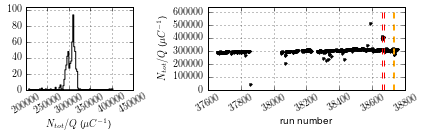

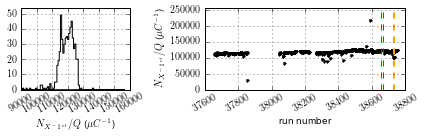

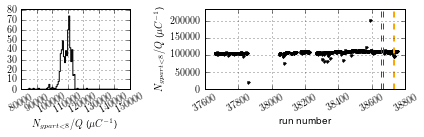

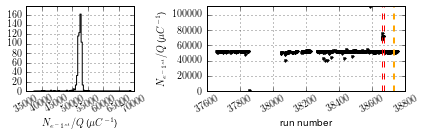

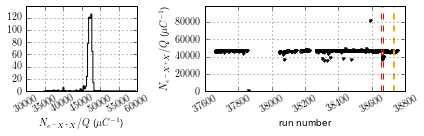

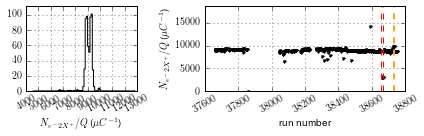

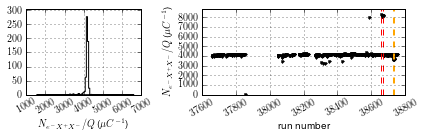

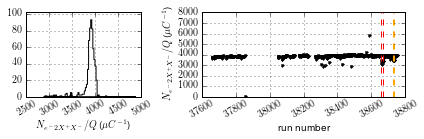

In [3]:
for col, lbl in zip(names_count, labels_count):
    xlbl = r'$%s/Q$ (${\mu}C^{-1}$)' % lbl
    trigN = (df[col]/df.Q)
    trigN.index = df.run
    avg = trigN.mean()
    spread = 5*trigN.where(trigN<2*avg).std()
    nbins = len(trigN.where(trigN<2*avg))/7
    fig = figure(figsize=(6,2), dpi=600)
    
    subplot2grid((1,5), (0,0), colspan=2)
    #dist = histogram(trigN.values, bins=50, range=(250000,350000))
    #xbincenters=(dist[1][1:]+dist[1][0:-1])/2
    #errorbar(xbincenters, dist[0], fmt='r')
    h = hist(trigN.values, bins=nbins, range=(avg-spread,avg+0.75*spread), color='k', histtype='step', )
    ylim(0, 1.1*np.max(h[0]))
    xticks(rotation=30)
    xlabel(xlbl) #, fontsize=12)
    grid()
    
    subplot2grid((1,5), (0,2), colspan=3)
    plot(trigN.index, trigN.values, 'k.')
    ylim([0,2*avg])
    xticks(rotation=30)
    xlabel('run number') #, fontsize=12)
    ylabel(xlbl) #, fontsize=12)
    #xlim((38655,38673))
    axvline(38657, lw=1, color='red', linestyle='--')
    axvline(38669, lw=1, color='red', linestyle='--')
    axvline(38728.5, lw=1, color='orange', linestyle='--')
    axvline(38734.5, lw=1, color='orange', linestyle='--')
    grid()
    
    tight_layout()
    
    show()

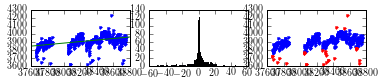

In [4]:
picks = (trigN<4500) & (trigN>3500) & (trigN.index<40000)
#picks = trigN.index<40000
trigN.index.values.astype(float)
par = polyfit(trigN[picks].index.values.astype(float), trigN[picks].values,1)
#print(trigN.index[picks])
#print(trigN.values[picks])
figure(figsize=(6,1))
subplot(131)
plot(trigN[picks].index,trigN[picks].values,'.')
plot(linspace(*xlim()), polyval(par, linspace(*xlim())))
subplot(132)
res = trigN[picks]-polyval(par, trigN[picks].index)
#chi2s = chi  chi**2 if chi>0 else -chi**2
res2N = res.apply(lambda x: x**2 if x > 0 else -x**2)/(res.count()-2)
hres2N = hist(res2N, bins=100, range=(-50,50))
subplot(133)
picksclose = (res2N>-22) & (res2N<22)
plot(trigN[picks][picksclose].index,trigN[picks][picksclose].values,'.')
plot(trigN[picks][~picksclose].index,trigN[picks][~picksclose].values,'.r')

Exception in thread Thread-2:
Traceback (most recent call last):
  File "/usr/lib/python2.7/threading.py", line 552, in __bootstrap_inner
    self.run()
  File "/usr/local/lib/python2.7/dist-packages/IPython/kernel/zmq/heartbeat.py", line 55, in run
    zmq.device(zmq.FORWARDER, self.socket, self.socket)
  File "device.pyx", line 55, in zmq.core.device.device (zmq/core/device.c:754)
ZMQError: Interrupted system call



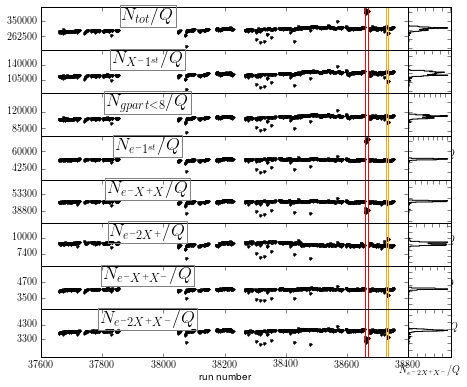

In [5]:
fig = figure(figsize=(6,6), dpi=600)
for n, col, lbl in zip(reversed(range(1,len(names_count)+1)), names_count, labels_count):
    ax1 = fig.add_axes([0.05, 0.1*n, 0.85, 1/9.0])
    xlbl = r'$%s/Q$' % lbl
    trigN = (df[col]/df.Q)
    trigN.index = df.run
    avg = trigN.mean()
    spread = 5*trigN.where(trigN<2*avg).std()
    nbins = len(trigN.where(trigN<2*avg))/7
    
    plot(trigN.index, trigN.values, 'k.', label=xlbl)
    ylim([avg/2,1.35*avg])
    lo, hi = min(yticks()[0]), max(yticks()[0])
    #yticks([lo+(hi-lo)/3,lo+2*(hi-lo)/3])
    yticks([round(mean([hi,lo]-(hi-lo)/8),-2), round(mean([hi,lo]+(hi-lo)/6),-2)])
    ax1.set_yticklabels(['$%d$'%v for v in yticks()[0]])
    #ax1.set_yticklabels(['${\mu}C$'])
    axvline(38657, lw=1, color='red', linestyle='-')
    axvline(38669, lw=1, color='red', linestyle='-')
    axvline(38728.5, lw=1, color='orange', linestyle='-')
    axvline(38734.5, lw=1, color='orange', linestyle='-')
    text(0.29, 0.8, xlbl, transform=ax1.transAxes, fontsize=18,
         horizontalalignment='center', verticalalignment='center',
         bbox=dict(edgecolor='gray', facecolor='none'))
    ax2 = fig.add_axes([0.9, 0.1*n, 0.1, 1/9.0])
    h = hist(trigN.values, bins=nbins, range=(avg-spread,avg+0.75*spread), color='k', histtype='step', orientation='horizontal')
    xlim(0, 1.1*np.max(h[0]))
    ylim([avg/2,1.35*avg])
    xlabel(xlbl) #, fontsize=12)
    ax2.set_yticklabels('')
    ax2.set_xticklabels('')
    if n == 1:
        ax1.set_xlabel('run number') #, fontsize=12)
        nlo, nhi = trigN.quantile(0.01), trigN.quantile(0.99)
#         ax1.axhline(nlo, lw=2, color='g', linestyle='-')
#         ax2.axhline(nlo, lw=2, color='g', linestyle='-')
#         ax1.axhline(nhi, lw=2, color='g', linestyle='-')
#         ax2.axhline(nhi, lw=2, color='g', linestyle='-')
        #ax1.set_yticks([round(mean([hi,lo]-(hi-lo)/4),-2), round(mean([hi,lo]+(hi-lo)/6),-2)])
    else:
        ax1.set_xticklabels('')
#     if n == 2:
#         ax1.axhline(3800, lw=2, color='g', linestyle='-')
#         ax2.axhline(3800, lw=2, color='g', linestyle='-')
#         ax1.axhline(4300, lw=2, color='g', linestyle='-')
#         ax2.axhline(4300, lw=2, color='g', linestyle='-')

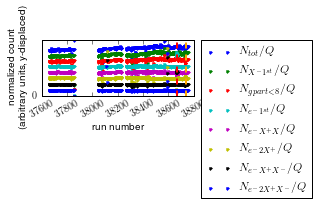

In [6]:
fig = figure(figsize=(6,1), dpi=600)
subplot(121)
for n, col, lbl in zip(reversed(range(1,len(names_count)+1)), names_count, labels_count):
    xlbl = r'$%s/Q$' % lbl
    trigN = (df[col]/df.Q)
    trigN = n*trigN/trigN[trigN < trigN.mean()+0.5*trigN.std()].mean()
    trigN.index = df.run
    avg = trigN.mean()
    spread = 5*trigN.where(trigN<2*avg).std()
    nbins = len(trigN.where(trigN<2*avg))/7
    
    plot(trigN.index, trigN.values, '.', label=xlbl)
    xticks(rotation=30)
    yticks(arange(1))
    xlabel('run number') #, fontsize=12)
    ylabel('normalized count\n(arbitrary units, y-displaced)', multialignment='center') #, fontsize=12
    
axvline(38657, lw=1, color='red', linestyle='--')
axvline(38669, lw=1, color='red', linestyle='--')
axvline(38728.5, lw=1, color='orange', linestyle='--')
axvline(38734.5, lw=1, color='orange', linestyle='--')
ylim(0,9.25)
legend(bbox_to_anchor=(1.05,1), loc=2, borderaxespad=0.) #fontsize=14, 

# Load luminosity block detail

Assumes CSV file was created as follows (backslash before dollar sign must be removed):

    root> .x projects/phys-ana-omega/scripts/oana-setup.C
    root> h10->SetScanField(0)
    root> h10->Scan("run:block:dq:sc_sect[sc[0]-1]"); > scan.log
    
    bash> cat /data/e1f/scan.log | sed 's/\*\ */,/g' | \
                                   sed 's/^,//g' | \
                                   sed 's/ ,\$//g' | \
                                   sed 's/ ,/,/g' | \
                                   sed '1,3d' > run_quality_e_sector.csv
    bash> sed -i '$d' /data/e1f/run_quality_e_sector.csv 
    bash> gzip /data/e1f/run_quality_e_sector.csv

In [8]:
# df2 = pd.DataFrame.from_csv('/data/e1f/run_quality_e_sector.csv')
df2 = pd.read_csv('/data/e1f/run_quality_e_sector.csv.gz', compression='gzip')
df2 = df2[(df2.dq>0) & (df2.dq<0.1)]

In [9]:
#g2 = df2.groupby(by=['run','block','sector'])
g2 = df2.groupby(by=['run','block'])
sc = g2.particle.count()
sdq = g2.dq.first()
dfc = pd.DataFrame([sc,sdq])
dfc = dfc.transpose()
#dfc['sector'] = [mi[2] for mi in dfc.index]
#dfc.columns=['events','dq','sector']
dfc.columns=['events','dq']
dfc['run'] = [mi[0] for mi in dfc.index]
dfc['eventsN'] = dfc.events/dfc.dq
# dfc['err'] = np.sqrt(dfc.events)/dfc.dq
# dfc['err_rel']=dfc.err/dfc.eventsN
# dfc['run'] = [mi[0] for mi in dfc.index]
# #dfc['sector'] = dfc.sector.astype(int)
# dfc['run'] = dfc.run.astype(float)

In [10]:
dfc.eventsN.index

MultiIndex
[37658  1 ,        2 ,        3 ,        4 ,        5 ,        6 ,        7 ,        8 ,        9 ,        10,        11,        12,        13,        14,        15,        16,        17,        18,        19,        20,        21,        22,        23,        24,        25,        26,        27,        28,        29,        30,        31,        32,        33,        34,        35,        36,        37,        38,        39,        40,        41,        42,        43,        44,        45,        46,        47,        48,        49,        50, ..., 38751  342,        343,        344,        345,        346,        347,        348,        349,        350,        351,        352,        353,        354,        355,        356,        357,        358,        359,        360,        361,        362,        363,        364,        365,        366,        367,        368,        369,        370,        371,        372,        373,        374,        375,        376,        377,  

In [11]:
def mkgaus(amp, mu, sigma):
    def fgaus(x):
        return amp*np.exp(-(x-mu)**2/(2*(sigma)**2))
    return fgaus

# Draw luminosity block information

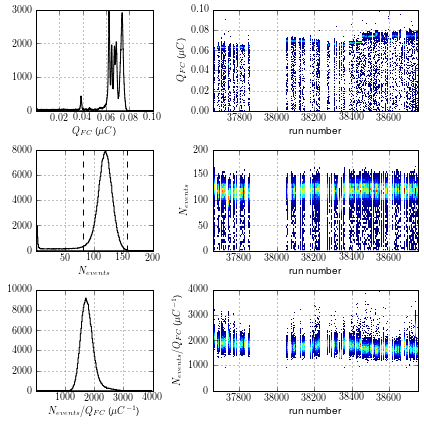

In [13]:
figure(figsize=(6,6))

#############
subplot2grid((3,5), (0,0), colspan=2)
dfc.dq.hist(bins=1000, histtype='step', color='k')
xlim(0.0,0.1)
xticks(arange(0.02, 0.102, 0.02))
yticks(arange(0,3001,1000))
xlabel(r'$Q_{FC}$ (${\mu}C$)')

subplot2grid((3,5), (0,2), colspan=3)
xfirst, xlast = dfc.run.min(), dfc.run.max()
hlbq, xedges, yedges,t = hist2d(dfc.run, dfc.dq,
                                bins=[list(arange(xfirst-0.5, xlast+1.5,1)),
                                      list(arange(0,0.1,0.001))],
                                cmin=1, cmax=1500)
xlabel('run number')
yticks(arange(0.0, 0.102, 0.02))
ylabel(r'$Q_{FC}$ (${\mu}C$)')
grid()
#############
subplot2grid((3,5), (1,0), colspan=2)
#dfc.events.hist(bins=list(arange(0,200,1)), histtype='step', color='k')
h = hist(dfc.events, bins=list(arange(0,201,1)), histtype='step', color='k')
hdf = pd.DataFrame({'x':(h[1][:-1]+h[1][1:])/2, 'y':h[0]})
amp = hdf.y.max()
muu = hdf.x[hdf.y == amp].values[0]
lo, hi = 75, 150
sig = dfc.events[(dfc.events>lo) & (dfc.events<hi)].std()
#sig = hdf.x[(hdf.x>muu-5*sig) & (hdf.x<muu+5*sig)].std()
#fgaus = mkgaus(amp, muu, sig)
#x = list(arange(0,200,1)) #linspace(h[1][0],h[1][-1])
#plot(x, fgaus(x), lw=1)
axvline(muu-3*sig, color='k', linestyle='--')
axvline(muu+3*sig, color='k', linestyle='--')
xlabel(r'$N_{events}$')
xt = xticks([x for x in xticks()[0] if x > 0])
yticks(list(arange(0,9000,2000)))
grid(True)

subplot2grid((3,5), (1,2), colspan=3)
hlbevt,t,t,t = hist2d(dfc.run, dfc.events,
                      bins=[xlast-xfirst, 50],
                      cmin=0.1, cmax=100)
yticks(list(arange(0,201,50)))
xlabel('run number')
ylabel(r'$N_{events}$')
grid()
##############
cut=(dfc.events>muu-3*sig) & (dfc.events<muu+3*sig)
subplot2grid((3,5), (2,0), colspan=2)
dfc.eventsN[cut].hist(bins=list(arange(0,4000,20)), histtype='step', color='k')
xlabel(r'$N_{events}/Q_{FC}$ (${\mu}C^{-1}$)')
xticks([x for x in arange(0,4001,1000) if x > 0])

subplot2grid((3,5), (2,2), colspan=3)
hlbevt,t,t,t = hist2d(dfc.run[cut], dfc.eventsN[cut],
                      bins=[list(arange(xfirst, xlast+1)),
                            list(arange(0,4000,40))],
                      cmin=0.1, cmax=120)
xlabel('run number')
ylabel(r'$N_{events}/Q_{FC}$ (${\mu}C^{-1}$)')
yticks(list(arange(0,4001,1000)))
grid()
##############

tight_layout()

INFO:rootpy.logger] | No default log handler configured. See `logging` module |
INFO:rootpy.logger] \    To suppress: 'rootpy.log.basic_config_colorized()'   /


True

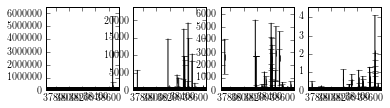

In [14]:
h2r = Hist2D(list(arange(xfirst-0.5,xlast+1.5,1)), list(arange(0,1000,15)))
h2r.fill_array(dfc[['run','eventsN']].values)
parmobjarr = r.TObjArray()
h2r.FitSlicesY(0,  0, -1, 1, 'qnr', parmobjarr)
fig = plt.figure(figsize=(6,1.5), dpi=600)
for iparm in range(0,4):
    parmobjarr[iparm]
    plt.subplot2grid([1,4], [0,iparm])
    parmobjarr[iparm].SetMarkerStyle(24)
    for ibin in range(1, parmobjarr[iparm].GetNbinsX()+1):
        if parmobjarr[iparm].GetBinContent(ibin) == 0:
            parmobjarr[iparm].SetBinContent(ibin, 0)
            parmobjarr[iparm].SetBinError(ibin, 0)
    rplt.errorbar(asrootpy(parmobjarr[iparm]), markersize=0.1)
    ylim(ymin=0)

locut = parmobjarr[1].Clone()
hicut = parmobjarr[1].Clone()
hicut.Add(parmobjarr[2], 4)
locut.Add(parmobjarr[2], -3)

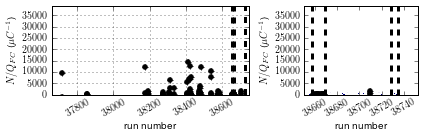

In [15]:
figure(figsize=(6,2), dpi=600)

subplot2grid((1,5), (0,0), colspan=3)
h2, xedges, yedges, h2img = hist2d(dfc.run, dfc.eventsN, bins=[list(arange(xfirst-0.5,xlast+1.5,1)), list(arange(0,1000,15))], cmin=1, cmax=1000)
axvline(38657, lw=3, color='black', linestyle='--')
axvline(38669, lw=3, color='black', linestyle='--')
axvline(38728.5, lw=2, color='black', linestyle='--')
axvline(38734.5, lw=2, color='black', linestyle='--')
parmobjarr[1].SetMarkerColor(r.kRed)
parmobjarr[1].SetMarkerStyle(25)
rplt.errorbar(asrootpy(hicut), xerr=False, yerr=False, emptybins=False)
rplt.errorbar(asrootpy(locut), xerr=False, yerr=False, emptybins=False)
rplt.errorbar(asrootpy(parmobjarr[1]), xerr=False, yerr=False, emptybins=False)
xticks(rotation=30)
xlabel('run number') #, fontsize=12)
ylabel(r'$N/Q_{FC}$ (${\mu}C^{-1}$)') #, fontsize=12)
xlim(xfirst-0.5,xlast+1.5)
ylim(ymin=0)
grid()

subplot2grid((3,5), (0,3), rowspan=3, colspan=2)
hist2d(dfc.run, dfc.eventsN, bins=[list(arange(38651-0.5,xlast+1.5,1)), list(arange(0,1000,30))], cmin=1, cmax=1000)
axvline(38657, lw=3, color='black', linestyle='--')
axvline(38669, lw=3, color='black', linestyle='--')
axvline(38728.5, lw=3, color='black', linestyle='--')
axvline(38734.5, lw=3, color='black', linestyle='--')
rplt.errorbar(asrootpy(hicut), xerr=False, yerr=False, emptybins=False)
rplt.errorbar(asrootpy(locut), xerr=False, yerr=False, emptybins=False)
rplt.errorbar(asrootpy(parmobjarr[1]), xerr=False, yerr=False, emptybins=False)
xlim(38651-0.5,xlast+1.5)
ylim(ymin=0)
xticks(rotation=30)
xlabel('run number') #, fontsize=12)
ylabel(r'$N/Q_{FC}$ (${\mu}C^{-1}$)') #, fontsize=12)

# subplot2grid((3,5), (2,3), rowspan=1, colspan=2)
# hist(dfc.eventsN[dfc.eventsN<1000], bins=1000/13, histtype='step', color='k')
# ylim(0,120000)
# yticks(arange(0,120001,40000))
# xlabel(r'$N/Q_{FC}$ (${\mu}C^{-1}$)', fontsize=12)

tight_layout()

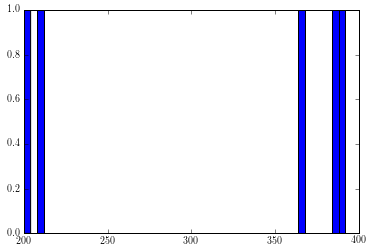

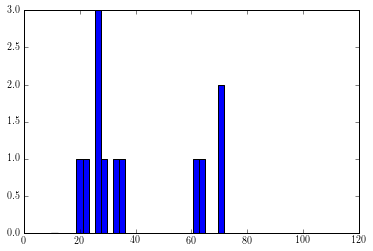

In [16]:
peaks =  asrootpy(parmobjarr[1])
peaksx = pd.Series(list(peaks.x()))
peaksy = pd.Series(list(peaks.y()))
peaksx = peaksx.apply(lambda x: x+0.5)
peaksx = peaksx[peaksy>0]
peaksy = peaksy[peaksy>0]
hist(peaksy, bins=50, range=[200,400])
spreads = pd.Series(list(asrootpy(parmobjarr[2]).y()))
#spreads = spreads[peaksy>0]
figure()
hist(spreads, bins=50, range=[10,120])
grpd0 = dfc.groupby(level=0)
grpd1 = dfc.groupby(level=1)
#grpd2 = dfc.groupby(level=2)
grpd01 = dfc.groupby(level=[0,1])

In [17]:
#grpd = dfc.groupby(['run'])
#runavgs = grpd.aggregate(np.mean).eventsN
#runavgs = grpd.aggregate(np.median).eventsN
df_rlb = grpd01.eventsN.sum()
x_run = grpd01.run.mean()

(83.91557490130995, 153.92436921044734)


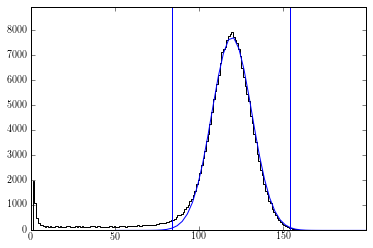

In [18]:
#htmp = hist(grpd1.events.sum(), bins=20, range=(0,1000))
htmp = Hist(arange(0,200,1))
htmp.fill_array(grpd01.events.sum())
htmp.Fit('gaus', '0', '', 100, 150)
rplt.hist(htmp)
f = htmp.GetListOfFunctions().At(0)
plot(linspace(50, 200), [f.Eval(51+150/50*step) for step in range(0,50)])
axvline(f.GetParameter(1)-3*f.GetParameter(2))
axvline(f.GetParameter(1)+3*f.GetParameter(2))
print(f.GetParameter(1)-3*f.GetParameter(2), f.GetParameter(1)+3*f.GetParameter(2))
#notenough = grpd01.run.mean()[grpd01.events.sum()<83]
#notenough

NameError: name 'yerrs' is not defined

(248590, 248590)


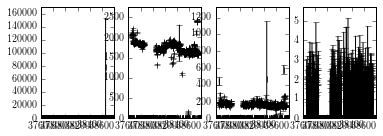

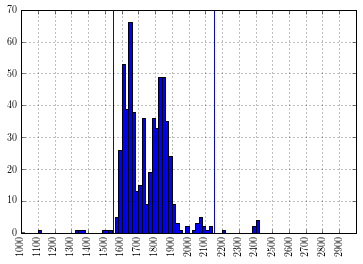

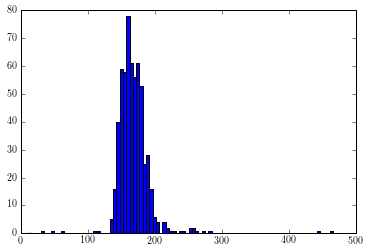

In [19]:
print(len(x_run),len(df_rlb))
df_run_lb = pd.DataFrame({'run':x_run, 'N':df_rlb})
h2r = Hist2D(list(arange(37600,38800,1)), list(arange(0,4000,50)))
h2r.fill_array(df_run_lb[['run','N']])
parmobjarr = r.TObjArray()
h2r.FitSlicesY(0,  1500, 3000, 1, 'qnr', parmobjarr)
fig = plt.figure(figsize=(6,2), dpi=600)
for iparm in range(0,4):
    parmobjarr[iparm]
    plt.subplot2grid([1,4], [0,iparm])
    parmobjarr[iparm].SetMarkerStyle(24)
    for ibin in range(1, parmobjarr[iparm].GetNbinsX()+1):
        if parmobjarr[iparm].GetBinContent(ibin) == 0:
            parmobjarr[iparm].SetBinContent(ibin, 0)
            parmobjarr[iparm].SetBinError(ibin, 0)
    rplt.errorbar(asrootpy(parmobjarr[iparm]), markersize=0.1)
    ylim(ymin=0)

locut = parmobjarr[1].Clone()
hicut = parmobjarr[1].Clone()
hicut.Add(parmobjarr[2], 4)
locut.Add(parmobjarr[2], -3)

peaks =  asrootpy(parmobjarr[1])
peaksx = pd.Series(list(peaks.x()))
peaksy = pd.Series(list(peaks.y()))
peaksx = peaksx.apply(lambda x: x+0.5)
peaksx = peaksx[peaksy>0]
peaksy = peaksy[peaksy>0]
figure()
hist(peaksy, bins=100, range=[1000,3000])
xticks(arange(1000,3000,100), rotation=90)
axvline(2150)
axvline(1550)
grid()
spreads = pd.Series(list(asrootpy(parmobjarr[2]).y()))
#spreads = spreads[peaksy>0]
figure()
hist(spreads, bins=100, range=[10,500])
grpd0 = dfc.groupby(level=0)
grpd1 = dfc.groupby(level=1)
#grpd2 = dfc.groupby(level=2)
grpd01 = dfc.groupby(level=[0,1])
#xticks([125,210])
#df_run_lb.run
#h2, xedges, yedges, h2img = hist2d(x_run, df_rlb, bins=[list(arange(37600,38800,1)), list(arange(0,4000,50))], cmin=1, cmax=100)
#h2, xedges, yedges, h2img = hist2d(dfc.run, dfc.eventsN, bins=[list(arange(37600,38800,1)), list(arange(0,700,15))], cmin=1, cmax=1000)
figure()
hist(yerrs/peaksy, 100, range=(0,0.02))

In [29]:
hist(res2N, bins=100, range=(-50,75))

NameError: name 'res2N' is not defined

/usr/local/lib/python2.7/dist-packages/numpy/lib/polynomial.py:585: RankWarning: Polyfit may be poorly conditioned
  warnings.warn(msg, RankWarning)


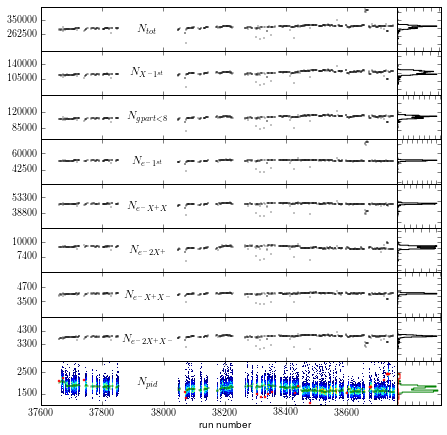

In [20]:
peaks =  asrootpy(parmobjarr[1])
spreads = asrootpy(parmobjarr[2])
peaksx = pd.Series(list(peaks.x()))
peaksy = pd.Series(list(peaks.y()))
yerrs = pd.Series([e[0] for e in peaks.yerr()])
# nevents = grpd01.events.sum()
# nevents.reindex(peaksx.index)
# nevents = nevents[peaksy>0]
spreads = pd.Series(list(spreads.y()))[peaksy>0]
yerrs = yerrs[peaksy>0]
peaksx = peaksx.apply(lambda x: x+0.5)
peaksx = peaksx[peaksy>0]
peaksy = peaksy[peaksy>0]

fig = figure(figsize=(6,6.15), dpi=600)
ax1 = fig.add_axes([0.075, 0.05, 0.85, 1/10.0])
h2, xedges, yedges, h2img = hist2d(df_run_lb.run, df_run_lb.N, bins=[list(arange(37600,38800,1)), list(arange(1000,3000,15))], cmin=1, cmax=1000)
#plot(peaksx, peaksy, 'k.')
#print(len(peaksy),len(yerrs))
#print(yerrs)
#errorbar(peaksx, peaksy, yerr=yerrs, fmt='k.')

#badx = peaksx[(spreads<50) | (spreads>100)]
#bady = peaksy[(spreads<50) | (spreads>100)]
#badx = peaksx[(spreads<125) | (spreads>210)]
#bady = peaksy[(spreads<125) | (spreads>210)]
badcrit = (spreads<100) | (spreads>300) | (peaksy < 1550) | (peaksy > 2150)
badx = peaksx[badcrit] # | (yerrs/peaksy > 0.02)] # | (nevents < 83)]
bady = peaksy[badcrit] # | (yerrs/peaksy > 0.02)] # | (nevents < 83)]

par = polyfit(peaksx[~badcrit], peaksy[~badcrit],8)
#plot(linspace(*xlim()), polyval(par, linspace(*xlim())), 'k')

res = peaksy-polyval(par, peaksx)
#chi2s = chi  chi**2 if chi>0 else -chi**2
res2N = res.apply(lambda x: x**2 if x > 0 else -x**2)/(res.count()-2)
#hres2N = hist(res2N, bins=100, range=(-50,50))
picksclose = (res2N>-40) & (res2N<75)
plot(peaksx[(picksclose) & (~badcrit)],peaksy[(picksclose) & (~badcrit)],'.g', ms=1)
plot(peaksx[(~picksclose) | (badcrit)],peaksy[(~picksclose) | (badcrit)],'.r', ms=4)
#plot(peaksx[(picksclose) & (~badcrit)],peaksy[(picksclose) & (~badcrit)]-3*spreads[(picksclose) & (~badcrit)],'.k')
#plot(badx, bady, 'r.')
text(0.29, 0.5, r'$N_{pid}$', transform=ax1.transAxes, fontsize=12,
     horizontalalignment='center', verticalalignment='center')
        #, bbox=dict(edgecolor='gray', facecolor='none'))
#plot(runavgs.index, runavgs.values, 'g.')
#for r in badruns: axvline(r, lw=1, color='r', linestyle='-')
ylim(1000,3000)
ax1.set_xlabel('run number') #, fontsize=12)
yticks([1500,2500])
ax1.set_yticklabels(['$%d$'%v for v in yticks()[0]])
ax2 = fig.add_axes([0.9, 0.05, 0.1, 1/10.0])
#h = hist(filter(lambda x: x>0, list(peaks.y())), bins=nbins, color='k', histtype='step', orientation='horizontal')
h1 = hist(peaksy, bins=50, color='g', histtype='step', orientation='horizontal')
h2 = hist(bady, color='r', histtype='step', orientation='horizontal', stacked=False)
     
ylim(1000,3000)
ax2.set_xticklabels('')
ax2.set_yticklabels('')
for n, col, lbl in zip(reversed(range(2,len(names_count)+2)), names_count, labels_count):
    ax1 = fig.add_axes([0.075, 0.05+0.1*(n-1), 0.85, 1/10.0])
    xlbl = r'$%s$' % lbl
    trigN = (df[col]/df.Q)
    trigN.index = df.run
    avg = trigN.mean()
    spread = 5*trigN.where(trigN<2*avg).std()
    nbins = len(trigN.where(trigN<2*avg))/7
    plot(trigN.index, trigN.values, 'k.', label=xlbl, ms=1)
    ylim([avg/2,1.35*avg])
    lo, hi = min(yticks()[0]), max(yticks()[0])
    #yticks([lo+(hi-lo)/3,lo+2*(hi-lo)/3])
    yticks([round(mean([hi,lo]-(hi-lo)/8),-2), round(mean([hi,lo]+(hi-lo)/6),-2)])
    ax1.set_yticklabels(['$%d$'%v for v in yticks()[0]])
    #ax1.set_yticklabels(['${\mu}C$'])
    #for r in badruns: axvline(r, lw=1, color='r', linestyle='-')
#     axvline(38657, lw=1, color='red', linestyle='-')
#     axvline(38669, lw=1, color='red', linestyle='-')
#     axvline(38728.5, lw=1, color='orange', linestyle='-')
#     axvline(38734.5, lw=1, color='orange', linestyle='-')
    text(0.29, 0.5, xlbl, transform=ax1.transAxes, fontsize=12,
         horizontalalignment='center', verticalalignment='center')
         #bbox=dict(edgecolor='gray', facecolor='none'))
    ax2 = fig.add_axes([0.9, 0.05+0.1*(n-1), 0.1, 1/10.0])
    h = hist(trigN.values, bins=nbins, range=(avg-spread,avg+0.75*spread), color='k', histtype='step', orientation='horizontal')
    xlim(0, 1.1*np.max(h[0]))
    ylim([avg/2,1.35*avg])
    ax2.set_yticklabels('')
    ax2.set_xticklabels('')
    ax1.set_xticklabels('')
fig.savefig('run_selection.pdf', dpi=600)

# Output parameters per run

Produce cut parameter files!

# Files per run

Investigate missing files!

# From full e1f chains

In [ ]:
WS = '/home/ephelps/projects/phys-ana-omega'
WS_SETUP = '%s/python/oana_setup.py' % WS
%run $WS_SETUP

import matplotlib.gridspec as gridspec
import rootplot.root2matplotlib as r2m
from matplotlib import rc
rc('text', usetex=True)

import itertools as it

import pylab as pl
from epfuncs import f_bwexpgaus
from epfuncs import f_bwexpgaus_pol4
from epfuncs import RejectWrapper
from epxsectutils import vgflux

from math import pi
mpi0, mpi, mrho0, mphi, mk = 0.1349766, 0.139570, 0.77549, 1.019445, 0.493677

In [ ]:
run.Draw("ntrigs/dq:run>>h_trigsPerQ_run(2000,37000.5,39000.5,1000,0,500000)","","goff")
run.Draw("ntrigs/dq>>h_trigsPerQ(1000,0,500000)","","goff")
h_trigsPerQ_run = asrootpy(r.gROOT.FindObject('h_trigsPerQ_run'))
h_trigsPerQ = asrootpy(r.gROOT.FindObject('h_trigsPerQ'))

In [ ]:
run.Draw("npassed/dq:run>>h_passedPerQ_run(2000,37000.5,39000.5,200,0,5000)","","goff")
run.Draw("npassed/dq>>h_passedPerQ(1000,0,5000)","","goff")
h_passedPerQ = asrootpy(r.gROOT.FindObject('h_passedPerQ'))
h_passedPerQ_run = asrootpy(r.gROOT.FindObject('h_passedPerQ_run'))

In [ ]:
parmobjarr = r.TObjArray()
h_passedPerQ_run.FitSlicesY(0,  0, -1, 1, 'qnr', parmobjarr)
#h_trigsPerQ_run.FitSlicesY(0,  0, -1, 1, 'qnr', parmobjarr)
fig = plt.figure(figsize=(6,2), dpi=600)
for iparm in range(0,4):
    parmobjarr[iparm]
    plt.subplot2grid([1,4], [0,iparm])
    parmobjarr[iparm].SetMarkerStyle(24)
    for ibin in range(1, parmobjarr[iparm].GetNbinsX()+1):
        if parmobjarr[iparm].GetBinContent(ibin) == 0:
            parmobjarr[iparm].SetBinContent(ibin, 0)
            parmobjarr[iparm].SetBinError(ibin, 0)
    rplt.errorbar(asrootpy(parmobjarr[iparm]), markersize=0.1)
    ylim(ymin=0)

locut = parmobjarr[1].Clone()
hicut = parmobjarr[1].Clone()
hicut.Add(parmobjarr[2], 3)
locut.Add(parmobjarr[2], -3)

In [ ]:
rc('text', usetex=False)
#gs = gridspec.GridSpec(1,8)
plt.figure(figsize=(6, 4), dpi=600)
plt.subplot2grid((2,5), (0,0), 1, 3)
plt.ticklabel_format(style='sci', axis='y', scilimits=(0, 0))
rplt.hist2d(h_trigsPerQ_run, cmin=1)
#r2m.Hist2D(h_trigsPerQ_run).col() #contour()
#ylim([0,600000])
ylim([2e5,4e5])
xlim([37600,38800])
plt.xlabel('$run~number$') #, fontsize=12)
plt.ylabel('$triggers/Q_{FC}~(\mu C^{-1})$') #, fontsize=12)
plt.xticks(rotation=30)

plt.subplot2grid((2,5), (0,3), 1, 2)
rplt.hist(h_trigsPerQ)
plt.xticks(rotation=30)
plt.xlabel('$triggers/Q_{FC}~(\mu C^{-1})$') #, fontsize=12)
plt.autoscale()
yscale('log')

plt.subplot2grid((2,5), (1,0), 1, 3)
plt.ticklabel_format(style='sci', axis='y', scilimits=(0, 0))
rplt.hist2d(h_passedPerQ_run, cmin=1)
plt.xlabel('run number') #, fontsize=12)
plt.ylabel('candidates/$Q_{FC}$ ($\mu C^{-1}$)') #, fontsize=12)
plt.xticks(rotation=30)
rplt.errorbar(asrootpy(hicut), markersize=0.1, xerr=False, yerr=False, emptybins=False)
rplt.errorbar(asrootpy(locut), markersize=0.1, xerr=False, yerr=False, emptybins=False)
htemp = asrootpy(parmobjarr[1])
htemp.SetLineColor(r.kRed)
htemp.SetMarkerColor(r.kRed)
rplt.errorbar(asrootpy(parmobjarr[1]), markersize=0.1, xerr=False, yerr=False, emptybins=False)
ylim([0,5e3])
xlim([37600,38800])
plt.subplot2grid((2,5), (1,3), 1, 2)
#r2m.Hist(h_trigsPerQ)
rplt.hist(h_passedPerQ)
plt.xticks(rotation=30)
plt.xlabel('$candidates/Q_{FC}~(\mu C^{-1})$')
plt.autoscale()
yscale('log')
plt.tight_layout()


In [ ]:
for iparm in range(0,4): print(parmobjarr[iparm].GetName())

In [ ]:
# def drawf(f, fcolor='red', xs = pl.arange(0.6, 0.95, 0.001)):
#     ys = pl.array([f.Eval(x) for x in xs])
#     plot(xs, ys, linewidth=2.0, color=fcolor)

# fgaus = r.TF1('fgaus', 'gaus', 0, 2000)
# htemp.Fit(fgaus, 'N0', 'goff')

# h_passedPerQ_run.GetXaxis().SetRangeUser(38199.5, 38200.5)
# htemp = asrootpy(h_passedPerQ_run.ProjectionY())
# rplt.hist(htemp)
# drawf(fgaus, xs=pl.arange(0,5000))

# Sandbox

AttributeError: 'DataFrame' object has no attribute 'err_rel'

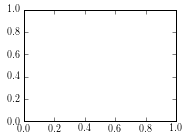

In [21]:
figure(figsize=(6,2), dpi=600)
subplot(1,2,1)
dfc.err_rel.hist(bins=1000)
subplot(1,2,2)
dfc.eventsN.hist(bins=list(arange(0,600,15)))

(37657.5, 38752.5)

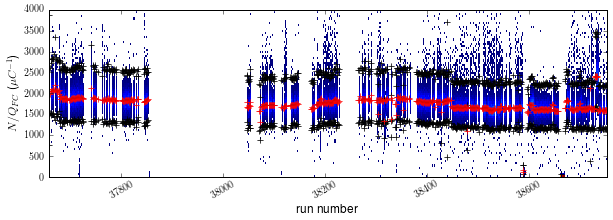

In [29]:
#factors = [290.0/v if v > 0 else 0 for v in parmobjarr[1] if v>0]
figure(figsize=(10,3), dpi=1200)
rplt.hist2d(h2r, cmin=1)
xticks(rotation=30)
xlabel('run number', fontsize=12)
ylabel(r'$N/Q_{FC}$ (${\mu}C^{-1}$)', fontsize=12)
rplt.errorbar(asrootpy(hicut), markersize=0.1, xerr=False, yerr=False, emptybins=False)
rplt.errorbar(asrootpy(locut), markersize=0.1, xerr=False, yerr=False, emptybins=False)
#htemp = asrootpy(parmobjarr[1])
#htemp.SetLineColor(r.kRed)
#htemp.SetMarkerColor(r.kRed)
rplt.errorbar(asrootpy(parmobjarr[1]), markersize=0.1, ecolor='red', xerr=False, yerr=False, emptybins=False)
ylim([0,4000])
xlim(xfirst-0.5,xlast+1.5)

Outliers:  [(15, 220)]


/usr/local/lib/python2.7/dist-packages/scikits/__init__.py:1: UserWarning: Module readline was already imported from /usr/lib/python2.7/lib-dynload/readline.so, but /usr/local/lib/python2.7/dist-packages is being added to sys.path
  __import__('pkg_resources').declare_namespace(__name__)
Exception in thread Thread-2:
Traceback (most recent call last):
  File "/usr/lib/python2.7/threading.py", line 552, in __bootstrap_inner
    self.run()
  File "/usr/local/lib/python2.7/dist-packages/IPython/kernel/zmq/heartbeat.py", line 55, in run
    zmq.device(zmq.FORWARDER, self.socket, self.socket)
  File "device.pyx", line 55, in zmq.core.device.device (zmq/core/device.c:754)
ZMQError: Interrupted system call



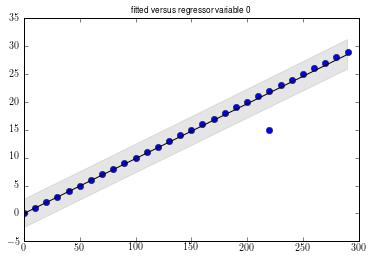

In [100]:
# Imports #
import statsmodels.api as smapi
import statsmodels.graphics as smgraphics
# Make data #
x = range(30)
y = [y*10 for y in x]
# Add outlier #
x.insert(6,15)
y.insert(6,220)
# Make graph #
regression = smapi.OLS(x, y).fit()
fig = smgraphics.regressionplots.plot_fit(regression, 0)
# Find outliers #
test = regression.outlier_test(
outliers = ((x[i],y[i]) for i,t in enumerate(test) if t[2] < 0.5)
print 'Outliers: ', list(outliers)

# # Imports #
# from random import random
# import statsmodels.api as smapi
# from statsmodels.formula.api import ols
# import statsmodels.graphics as smgraphics
# # Make data #
# x = range(30)
# y = [y*(10+random())+200 for y in x]
# # Add outlier #
# x.insert(6,15)
# y.insert(6,220)
# # Make fit #
# regression = ols("data ~ x", data=dict(data=y, x=x)).fit()
# # Find outliers #
# test = regression.outlier_test()
# outliers = ((x[i],y[i]) for i,t in enumerate(test.icol(2)) if t < 0.5)
# print 'Outliers: ', list(outliers)
# # Figure #
# figure = smgraphics.regressionplots.plot_fit(regression, 1)
# # Add line #
# smgraphics.regressionplots.abline_plot(model_results=regression, ax=figure.axes[0])

In [5]:
len(df.run.unique())

606

In [8]:
df_missingfiles = pd.DataFrame(root2rec('/home/ephelps/Dropbox/missingfiles.root', 'tlbmiss'))

In [13]:
len(df_missingfiles.tlbmiss_run.unique())

204

In [17]:
len(df_missingfiles[df_missingfiles.tlbmiss_fnum==1].tlbmiss_run.unique())

170

In [18]:
len(df_missingfiles[df_missingfiles.tlbmiss_fnum>1].tlbmiss_run.unique())

56

In [47]:
df_rf_e1f = pd.read_table('/data/e1f/runfile.e1f.csv', ',')
df_rf_e16 = pd.read_table('/data/e16/runfile.e16.csv', ',')

In [89]:
grpd = df_rf_e1f.groupby('run')

In [90]:
len(df_rf_e16.run[df_rf_e1f.filenum==0])

277

In [92]:
nfiles = grpd.count().filenum.sum()
nruns = len(df_rf_e16.run.unique())
print(nfiles, nruns, nfiles/nruns)

(12361, 612, 20)


In [93]:
len(df_rf_e1f[df_rf_e1f.filenum==0])

405

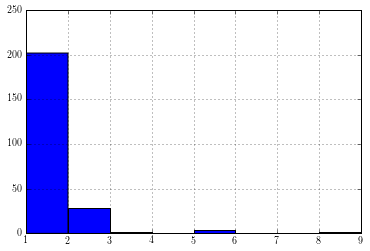

In [99]:
def get_nmissing(g):
    mx = max(g.filenum)
    checklist = set(range(0,mx+1))
    return len(checklist-set(g.filenum))
    #return mx

grpd.apply(get_nmissing).hist(bins=8, range=(1,9))